<a href="https://colab.research.google.com/github/ArujFatima/Bike-Store-Sales/blob/main/Bike_Store_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bike store sales

In [ ]:
import pandas as pd
import requests
import io

url = "https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv"

response = requests.get(url)
sales = pd.read_csv(io.StringIO(response.text))
sales

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## The data at a glance

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales.shape

(113036, 18)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [ ]:
sales.describe() #to know statistic properties

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


# Numercial analysis and Vistualization



In [ ]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [ ]:
sales['Unit_Cost'].mean()

267.296365759581

In [ ]:
sales['Unit_Cost'].median()

9.0

<Axes: >

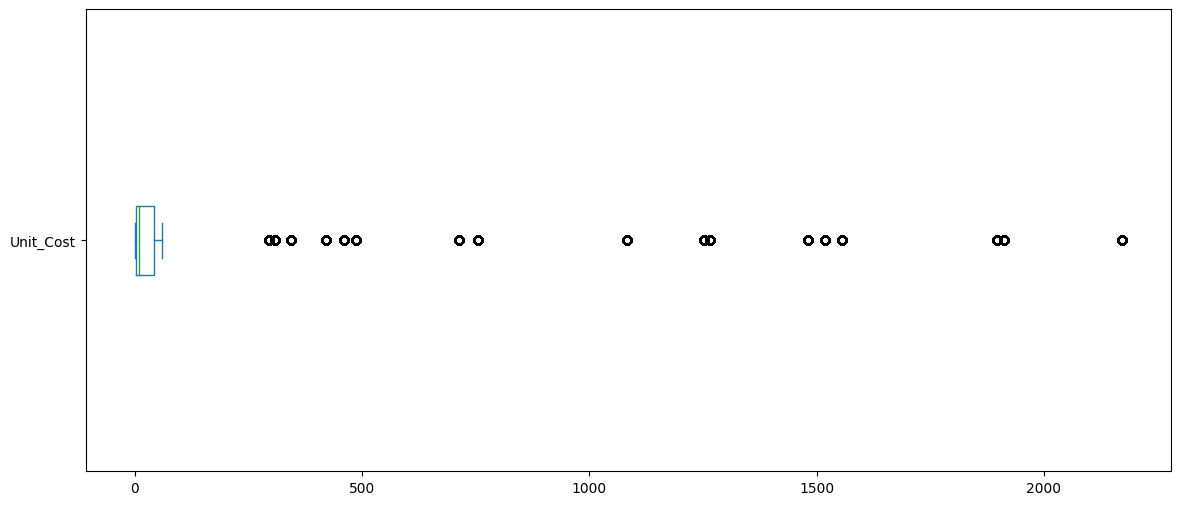

In [ ]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: ylabel='Density'>

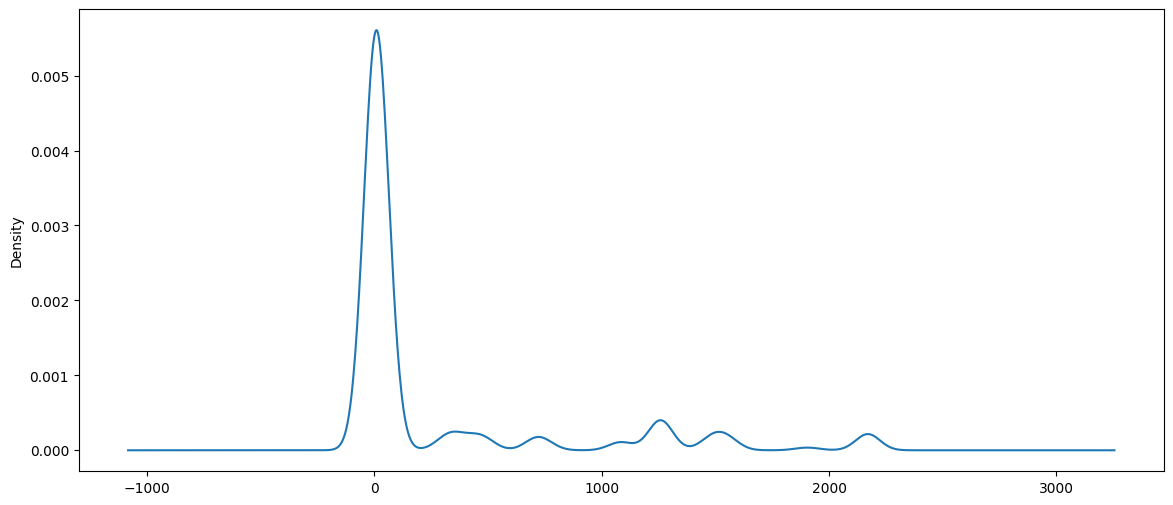

In [ ]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) 

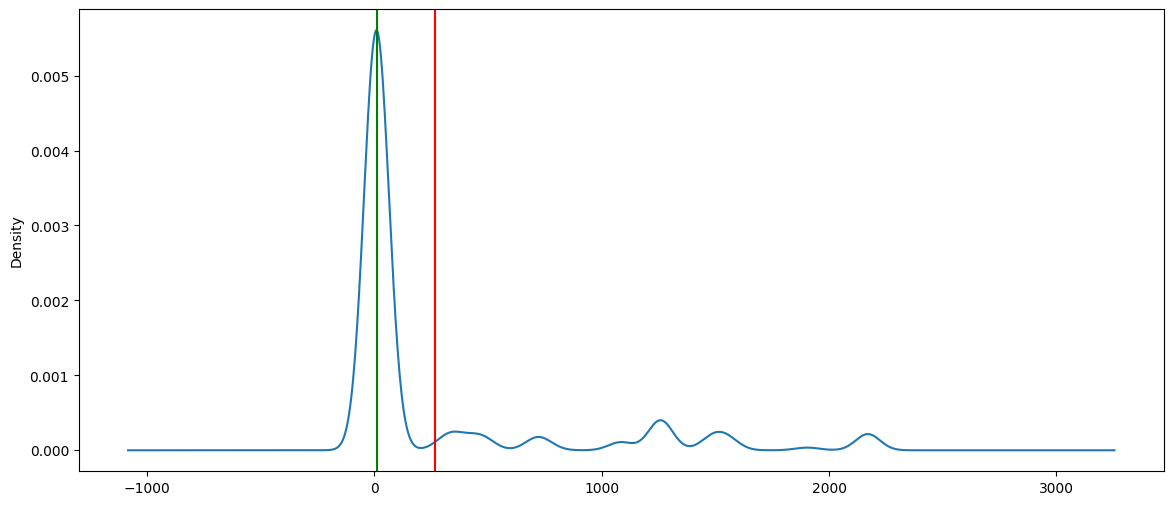

In [ ]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean( ), color='red')
ax.axvline(sales['Unit_Cost'].median( ), color='green')

Text(0.5, 0, 'dollars')

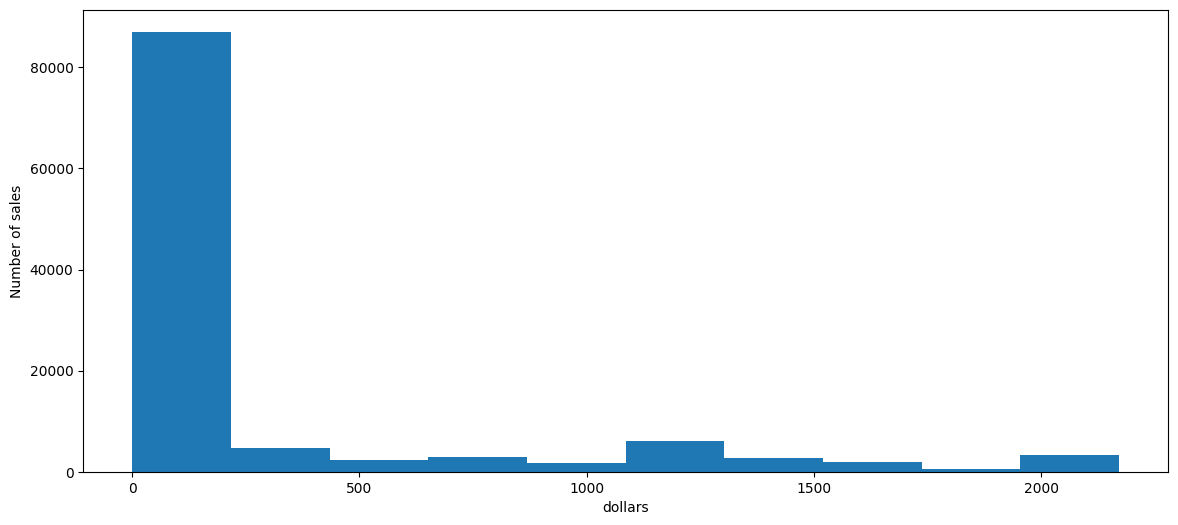

In [ ]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of sales')
ax.set_xlabel('dollars')

#Categorical analysis and visualization

Analyze the **Age_group** Column

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<Axes: ylabel='Age_Group'>

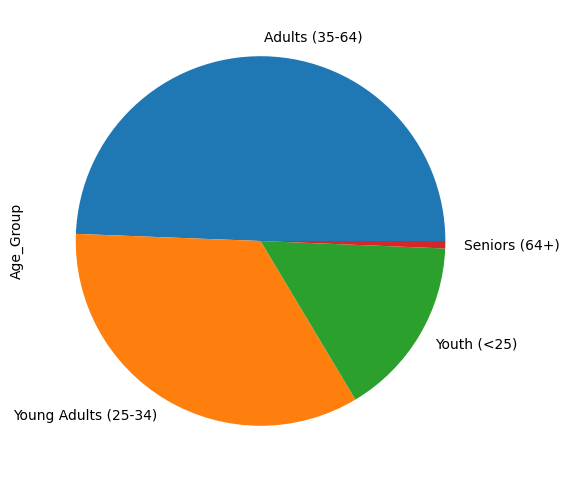

In [ ]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0.5, 0, 'Age_Groups')

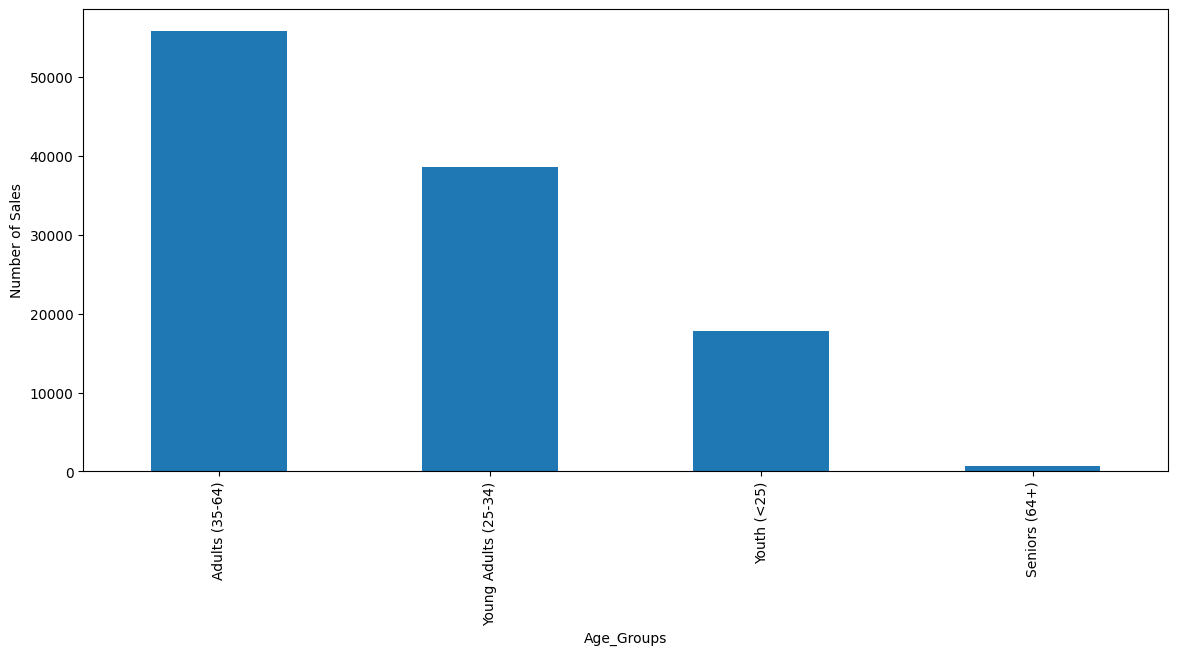

In [ ]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Age_Groups')

# Relationship B/W the columns

In [ ]:
corr = sales.corr()
corr

<ipython-input-19-9ba3b0e08523>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr()


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


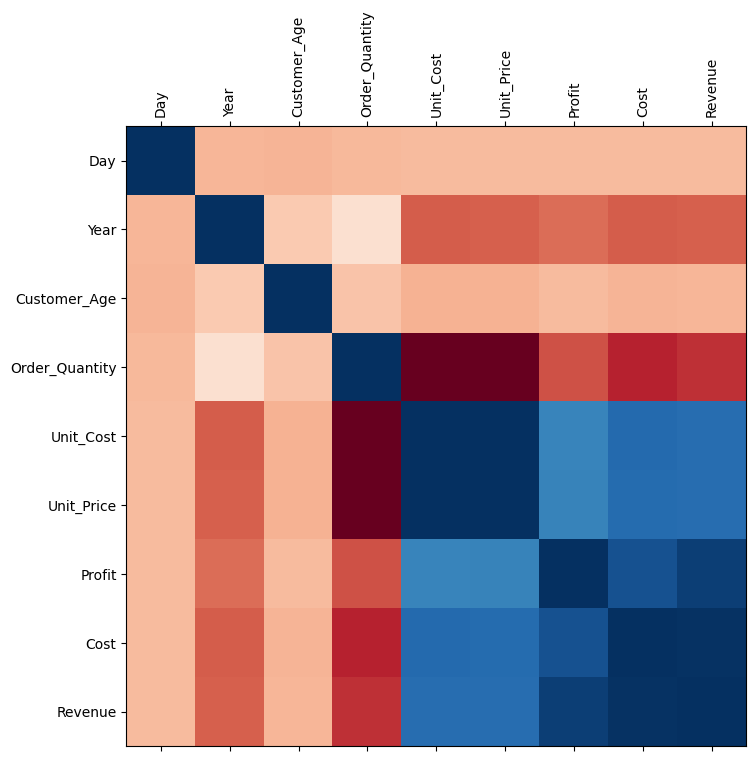

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

ValueError: ignored

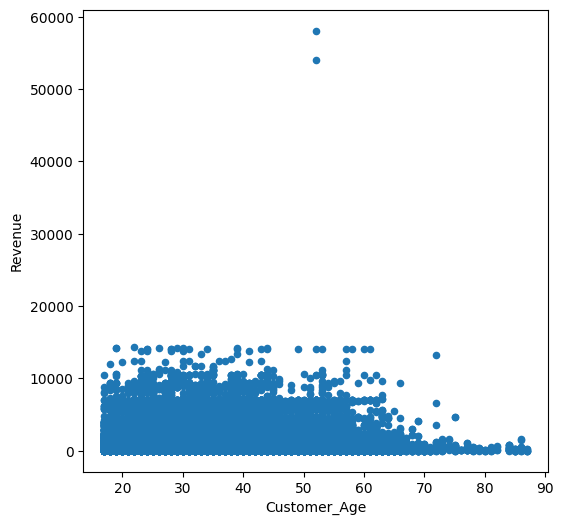

In [ ]:
ax = sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))
ax.axvline(sales['Unit_Cost'], color='green')
#scatter:Creates a scatter plot, showing the relationship between two variables using dots.

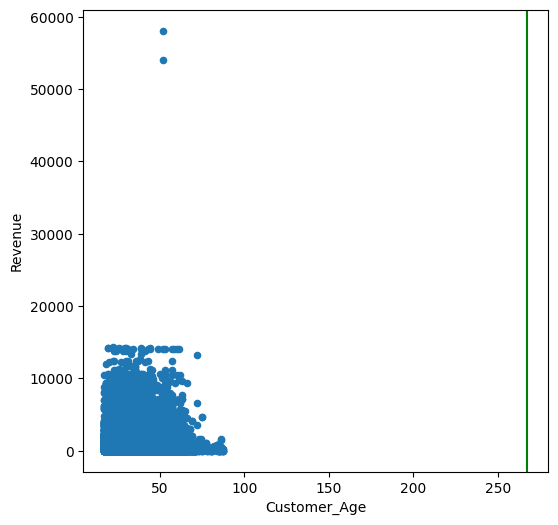

In [ ]:


# Create a scatter plot
ax = sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6, 6))

# Calculate the mean of 'Unit_Cost'
mean_unit_cost = sales['Unit_Cost'].mean()

# Add a vertical line at the mean value
ax.axvline(x=mean_unit_cost, color='green')

# Display the plot
plt.show()


Text(0, 0.5, 'Profit')

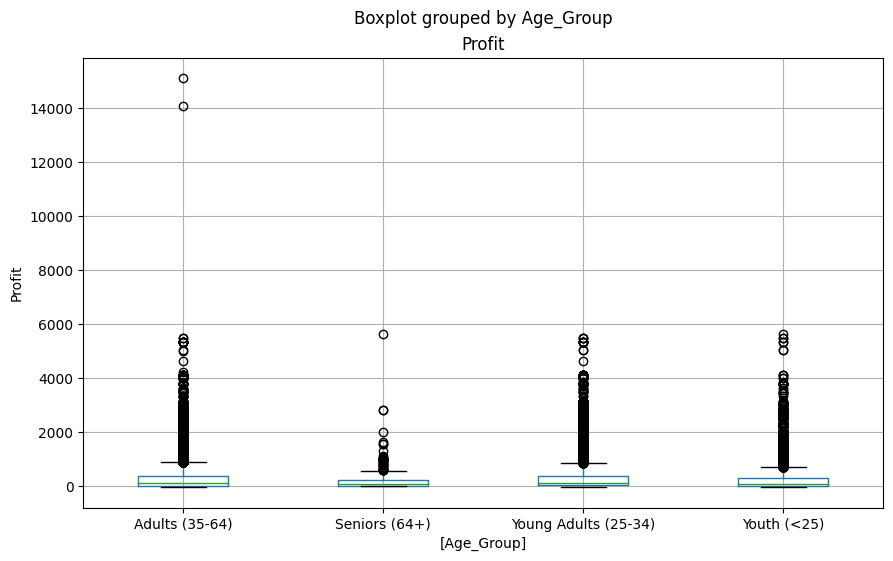

In [ ]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10, 6))
ax.set_ylabel('Profit')

In [ ]:
profit_by_age_group = sales.groupby('Age_Group')['Profit'].sum()
max_profit_age_group = profit_by_age_group.idxmax()
max_profit_age_group

'Adults (35-64)'

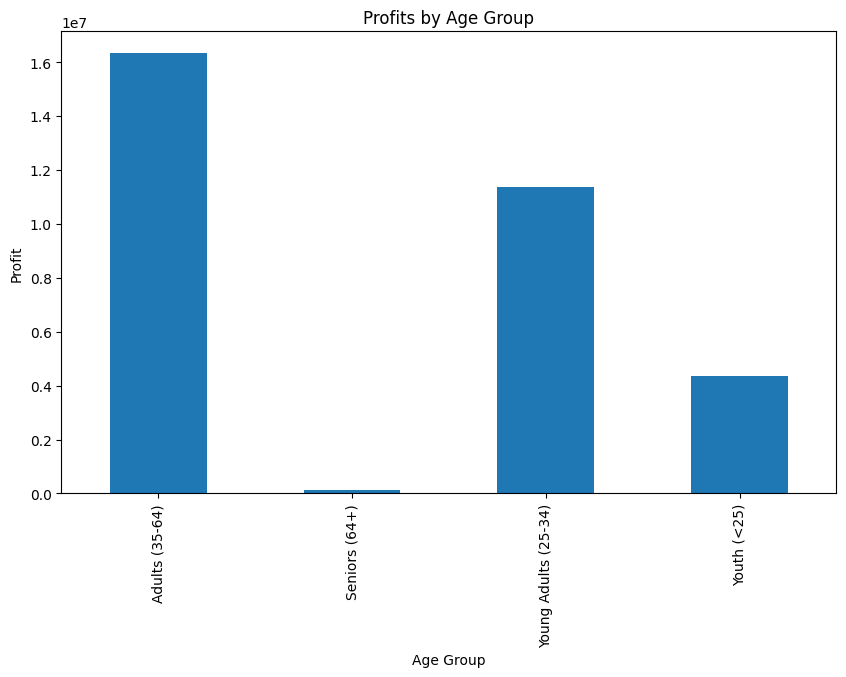

In [ ]:
plt.figure(figsize=(10, 6))
profit_by_age_group.plot(kind='bar') #which visualizes the profits for each age group as vertical bars.
plt.xlabel('Age Group')
plt.ylabel('Profit')
plt.title('Profits by Age Group')
plt.show()


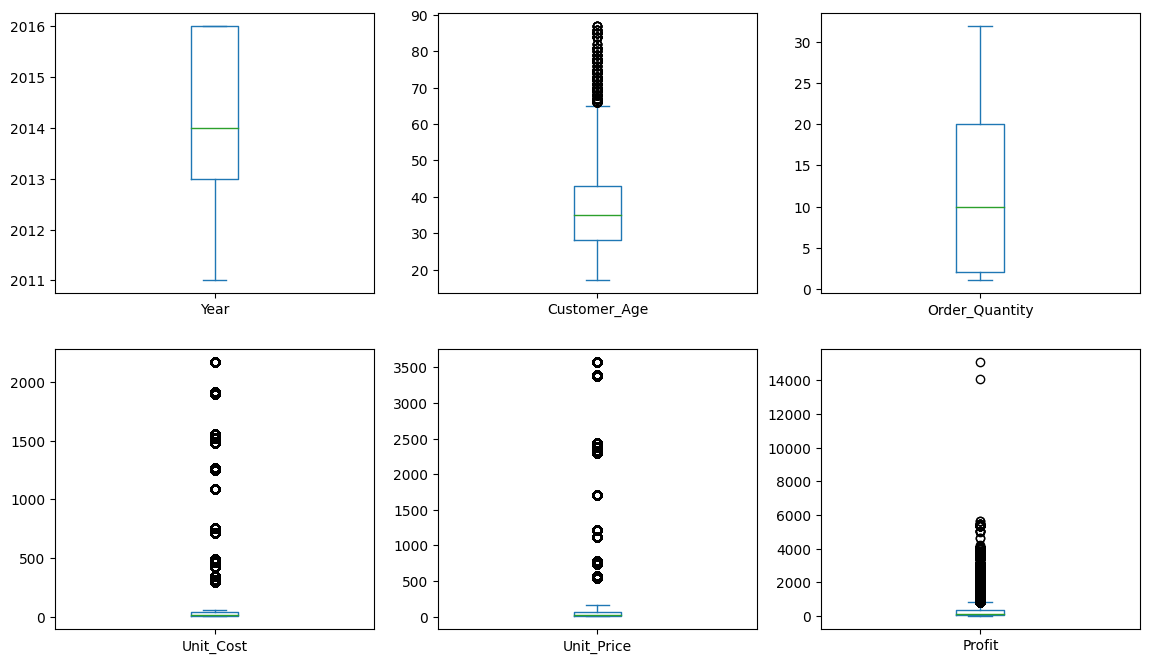

In [ ]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8));

#Column Wrangling
####We can create a new column or modify existing one

##Add and calculate a new Revenue_per_Age column

In [ ]:
sales['Revenue_per_Age'] =  sales['Revenue'] / sales['Customer_Age']
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<Axes: ylabel='Density'>

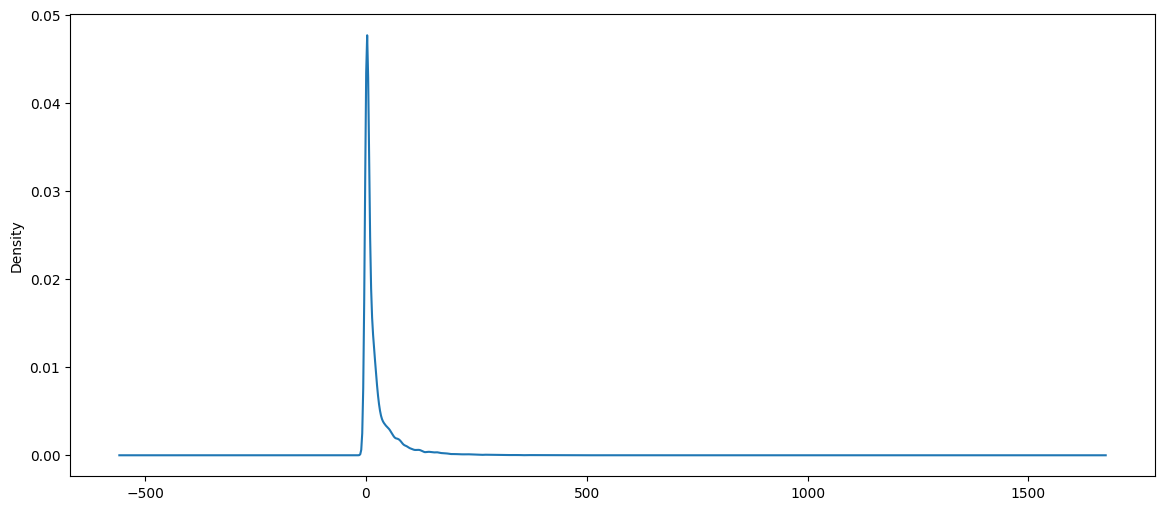

In [ ]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

<Axes: ylabel='Frequency'>

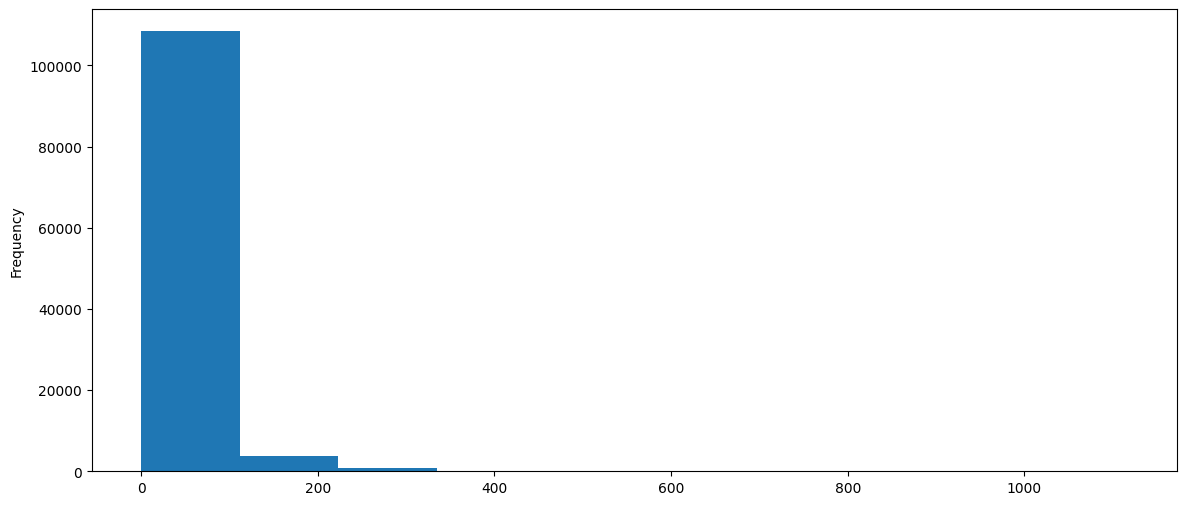

In [ ]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

#Add and calculate a new Calculated_Cost column
#### Calculate_Cost = Order_Quantity * Unit Cost

In [ ]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales['Calculated_Cost'] .head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [ ]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

The relationship between Cost and Profit using a scatter plot

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

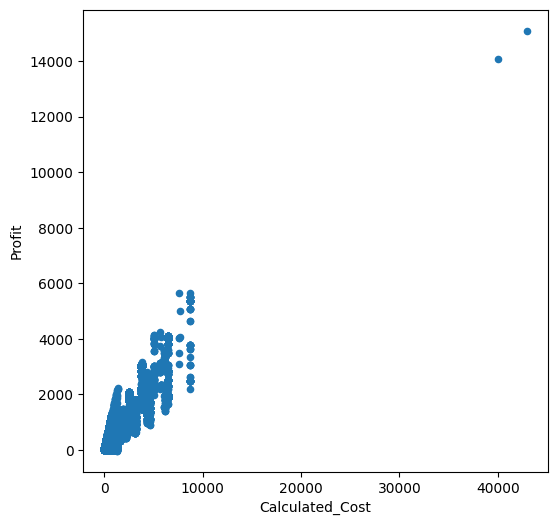

In [ ]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))
#kind='scatter': Creates a scatter plot, showing the relationship between two variables using dots.

Add and calculate a new Calculated_Revenue column

In [ ]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']
sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [ ]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

In [ ]:
sales

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,...,"Classic Vest, S",3,24,64,112,72,184,4.487805,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,...,"Classic Vest, M",22,24,64,655,528,1183,65.722222,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,...,"Classic Vest, M",22,24,64,655,528,1183,65.722222,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,...,"Classic Vest, L",24,24,64,684,576,1260,34.054054,576,1260


<Axes: ylabel='Frequency'>

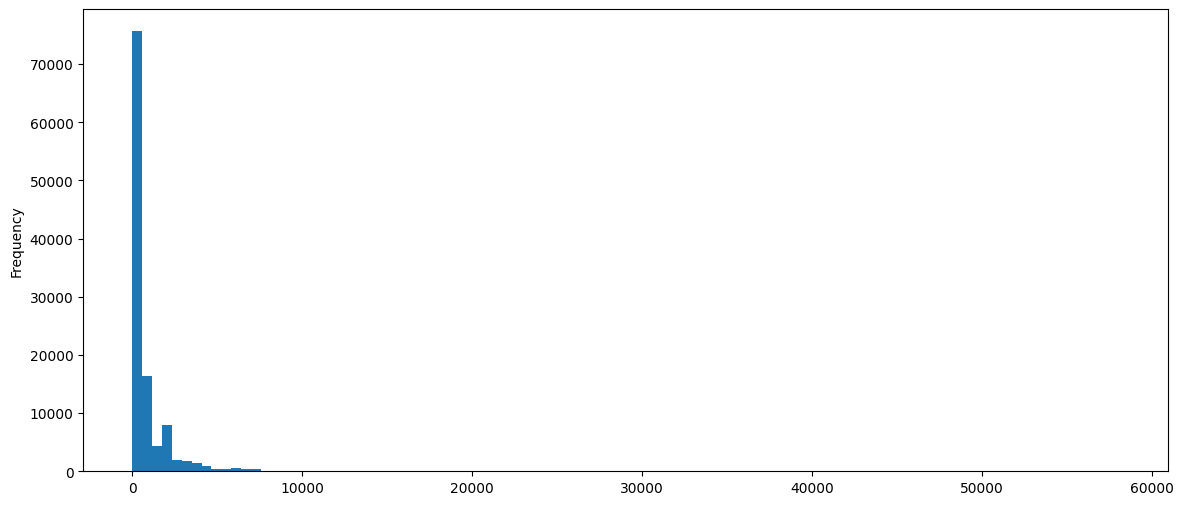

In [ ]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

Modify all Unit_Price values adding 3% tax to them

In [ ]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [ ]:
sales['Unit_Price'] *=1.03

In [ ]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

#Selection and Indexing:
Get all the sales made in the state of Kentucky

In [ ]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


Get the mean revenue of the Adults (35-64) sales group

In [ ]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)',  'Revenue'].mean()

762.8287654055604

How many records belong to Age Group Youth (<25) or Adults (35-64) ?

In [ ]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]


73652

Get the mean revenue of the sales group Adults (35-64) in United States

In [ ]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()


726.7260473588342

Increase the revenue by 10% to every sale made in France

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()


50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'] .head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1


In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'] .head()


50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

#What's the mean of Customers_Age?

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,123.6,590,360,950.0,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,123.6,590,360,950.0,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,123.6,1366,1035,2401.0,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,123.6,1188,900,2088.0,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,123.6,238,180,418.0,8.893617,180,418


In [ ]:
sales['Customer_Age'].mean()

35.91921157861212

Go ahead and show a density (KDE) and a box plot with the Customer_Age data:

In [ ]:
#kind='kde': Generates a kernel density estimation (KDE) plot, which shows the probability density of a continuous variable. Kernel Density Estimation (KDE): The density plot is created using KDE, which estimates the probability density function of the variable by placing a kernel (a smooth function) at each data point and summing them to obtain the density estimate.

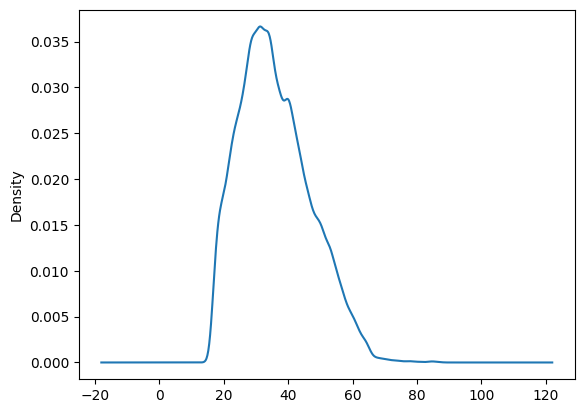

In [ ]:

sales['Customer_Age'].plot.kde();

<Axes: ylabel='Density'>

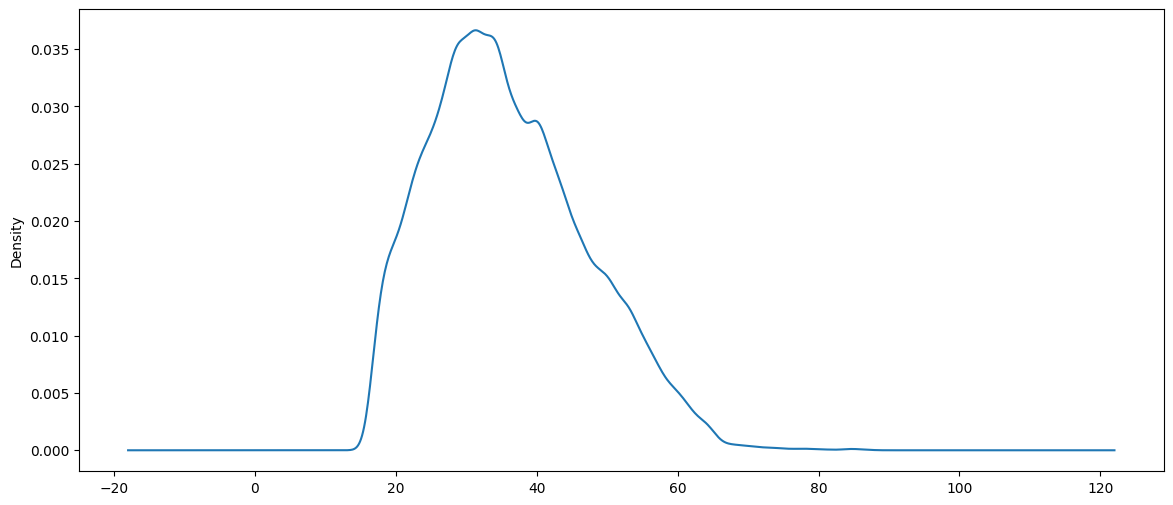

In [ ]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

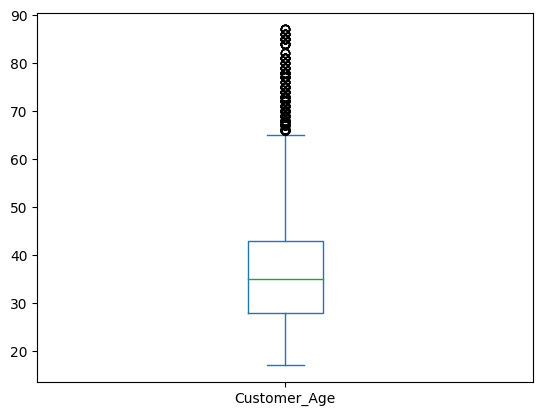

In [ ]:
sales['Customer_Age'].plot.box();

<Axes: >

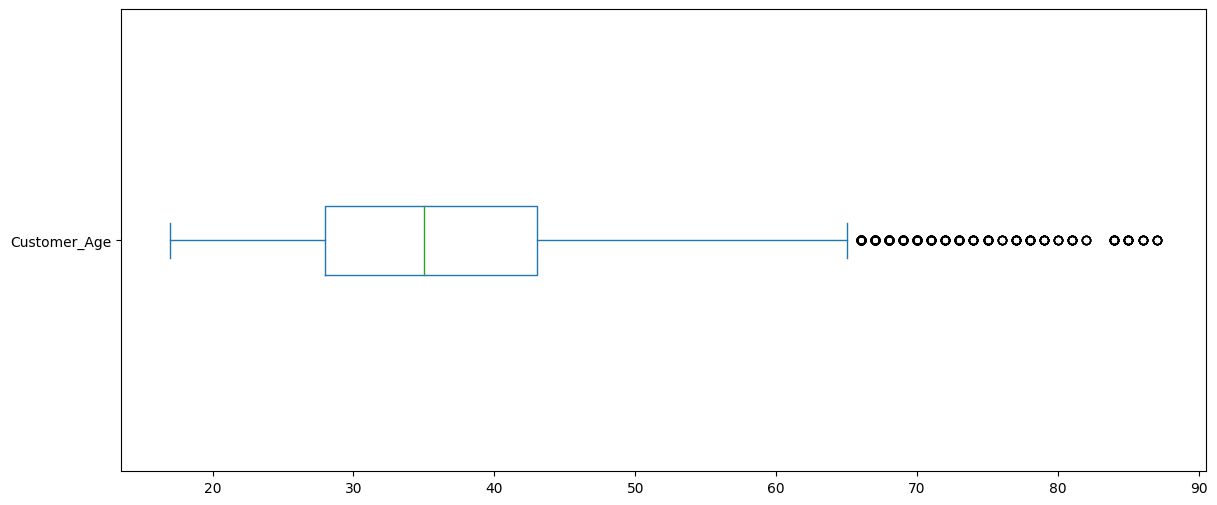

In [ ]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

What's the mean of Order_Quantity?

In [ ]:
sales['Order_Quantity'].mean()

11.901659648253654

<Axes: ylabel='Frequency'>

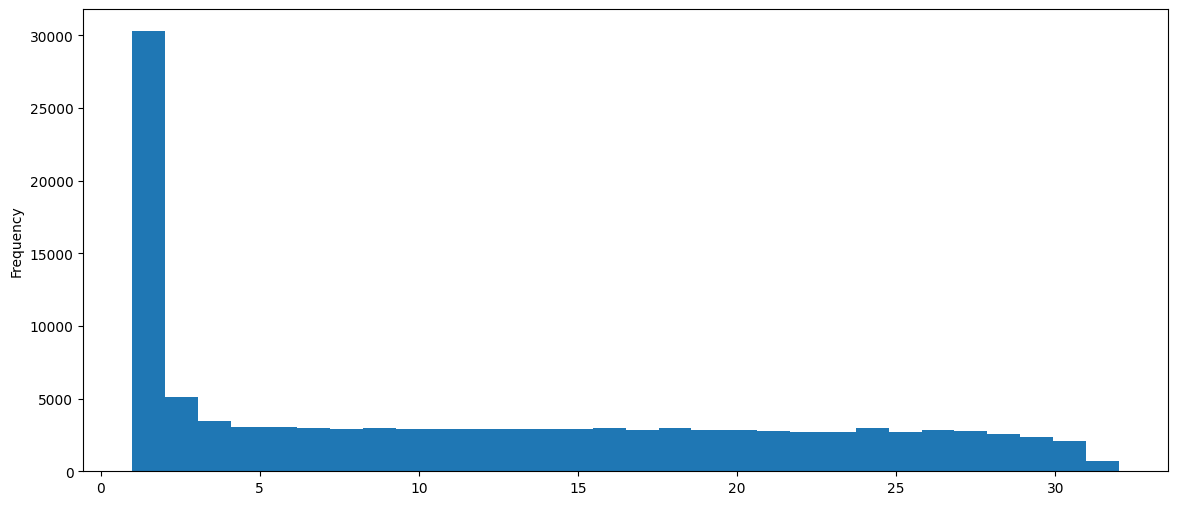

In [ ]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))
#A histogram is a graphical representation of the distribution of a dataset. It displays the frequencies or counts of values within specific intervals, called bins.

<Axes: >

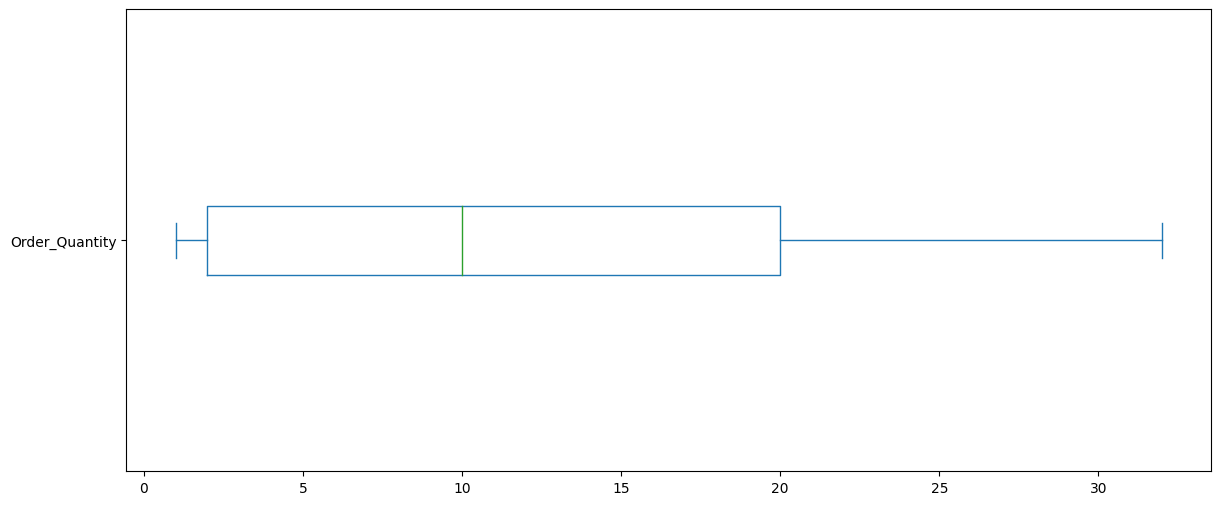

In [ ]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

#How many sales per year?

In [ ]:
sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<Axes: ylabel='Year'>

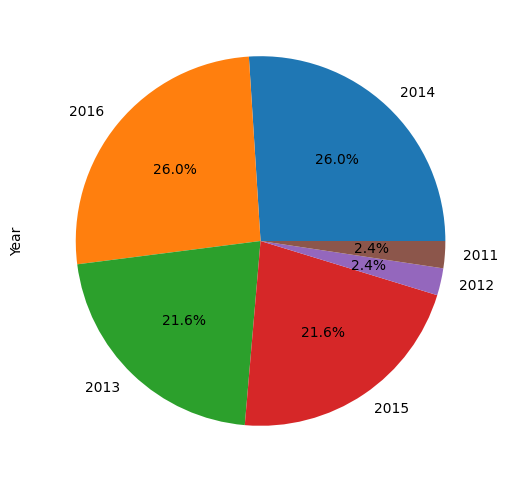

In [ ]:
sales['Year'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

How many sales per month?

In [ ]:
sales_per_month = sales.groupby('Month')['Revenue'].sum()
sales_per_month

Month
April        7602750
August       5711193
December     9086931
February     6834583
January      7005895
July         5721459
June         9043008
March        7347164
May          8836763
November     6244298
October      5995079
September    5841885
Name: Revenue, dtype: int64

In [ ]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<Axes: ylabel='Revenue'>

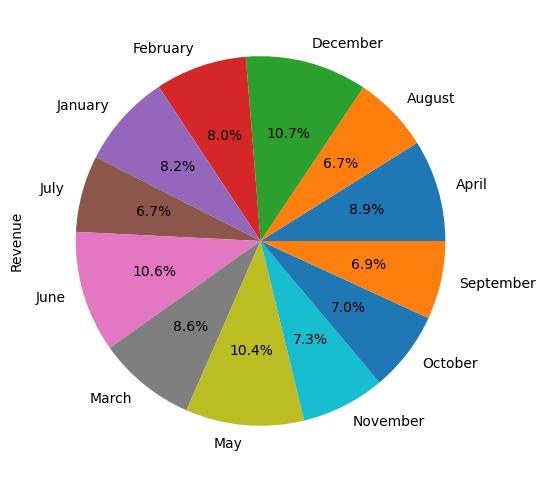

In [ ]:
sales_per_month.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))

<Axes: ylabel='Month'>

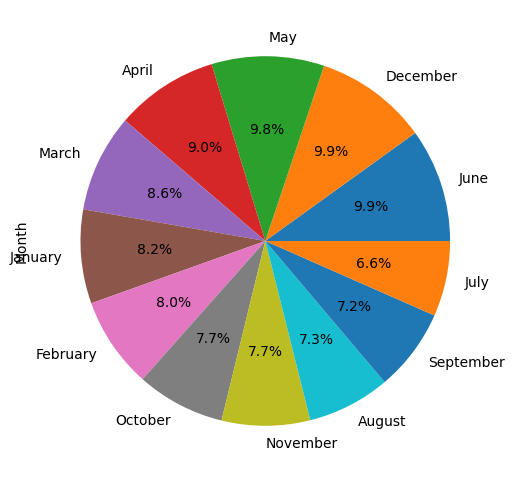

In [ ]:
sales['Month'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

#Which country has the most sales quantity of sales?

In [ ]:
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

<Axes: >

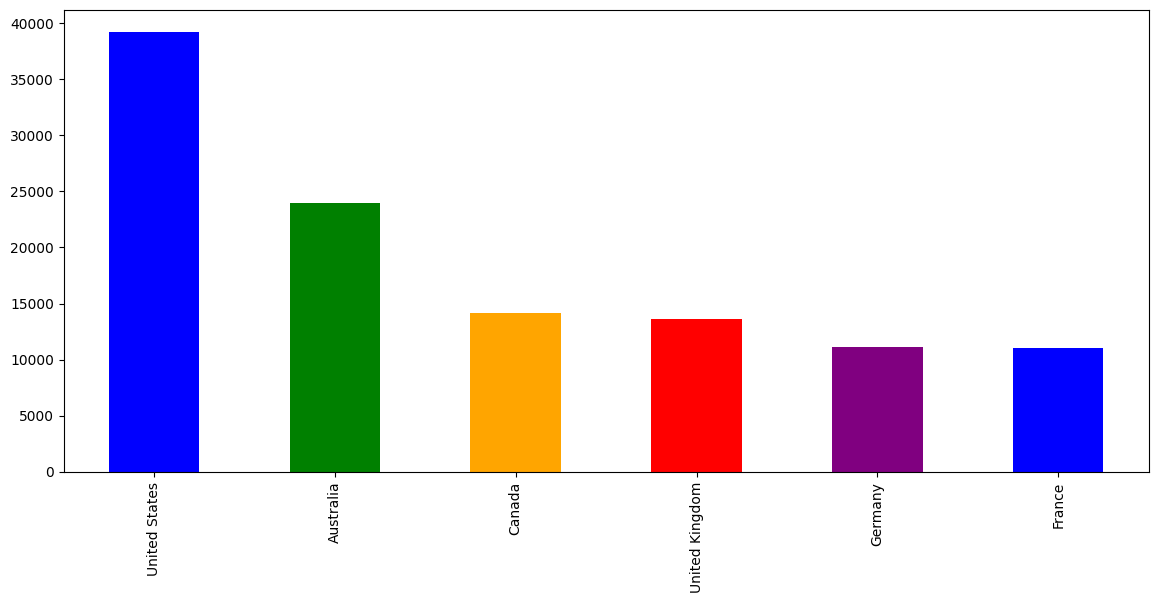

In [ ]:
# Define custom colors based on count
colors = ['blue', 'green', 'orange', 'red', 'purple']
sales['Country'].value_counts().plot(kind='bar',color=colors, figsize=(14,6))

#Create a list of every product sold

In [ ]:
product_list = sales['Product'].unique().tolist()
product_list

['Hitch Rack - 4-Bike',
 'All-Purpose Bike Stand',
 'Mountain Bottle Cage',
 'Water Bottle - 30 oz.',
 'Road Bottle Cage',
 'AWC Logo Cap',
 'Bike Wash - Dissolver',
 'Fender Set - Mountain',
 'Half-Finger Gloves, L',
 'Half-Finger Gloves, M',
 'Half-Finger Gloves, S',
 'Sport-100 Helmet, Black',
 'Sport-100 Helmet, Red',
 'Sport-100 Helmet, Blue',
 'Hydration Pack - 70 oz.',
 'Short-Sleeve Classic Jersey, XL',
 'Short-Sleeve Classic Jersey, L',
 'Short-Sleeve Classic Jersey, M',
 'Short-Sleeve Classic Jersey, S',
 'Long-Sleeve Logo Jersey, M',
 'Long-Sleeve Logo Jersey, XL',
 'Long-Sleeve Logo Jersey, L',
 'Long-Sleeve Logo Jersey, S',
 'Mountain-100 Silver, 38',
 'Mountain-100 Silver, 44',
 'Mountain-100 Black, 48',
 'Mountain-100 Silver, 48',
 'Mountain-100 Black, 38',
 'Mountain-200 Silver, 38',
 'Mountain-100 Black, 44',
 'Mountain-100 Silver, 42',
 'Mountain-200 Black, 46',
 'Mountain-200 Silver, 42',
 'Mountain-200 Silver, 46',
 'Mountain-200 Black, 38',
 'Mountain-100 Black, 42

Create a bar plot showing the 10 most sold products (best sellers):

In [ ]:
product_counts = sales['Product'].value_counts()
colors = ['blue', 'green', 'orange', 'red', 'purple']
# Select the top 10 products
product_counts.head(10).plot(kind='bar', figsize=(14,6), color=colors)

#Any relationship between Unit_Cost and Unit_Price?

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

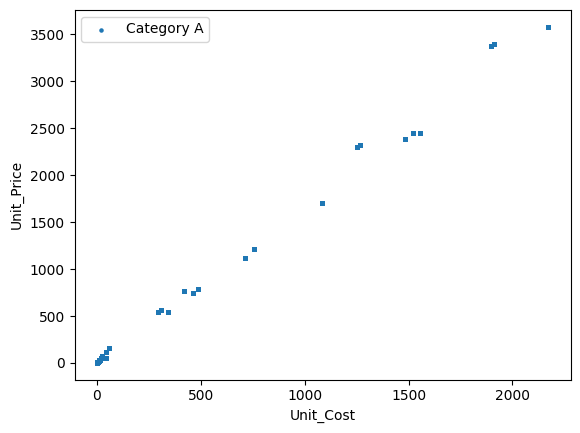

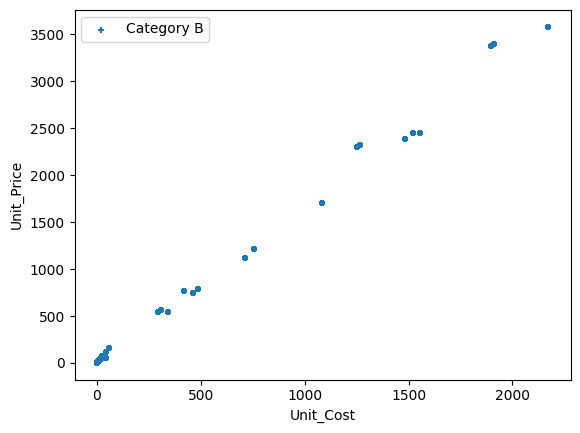

In [ ]:
#Scatter plots are useful for visualizing the relationship between two continuous variables. 

sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', marker='.', label='Category A')
sales.plot(kind='scatter',x='Unit_Cost', y='Unit_Price', marker='+', label='Category B')

##Relationship b/w Order_Quantity and Profit
Show a scatter plot b/w both columnns

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

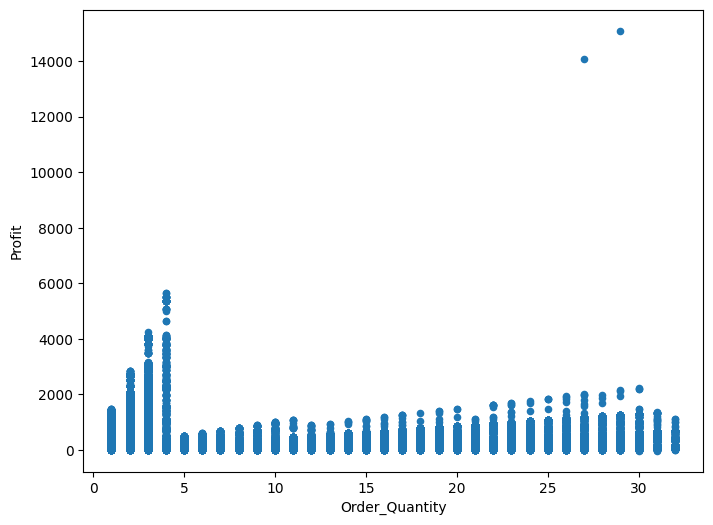

In [ ]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(8,6))

##Relationship B/w Profit per Country?
Show a grouped box plot country with the profit values.

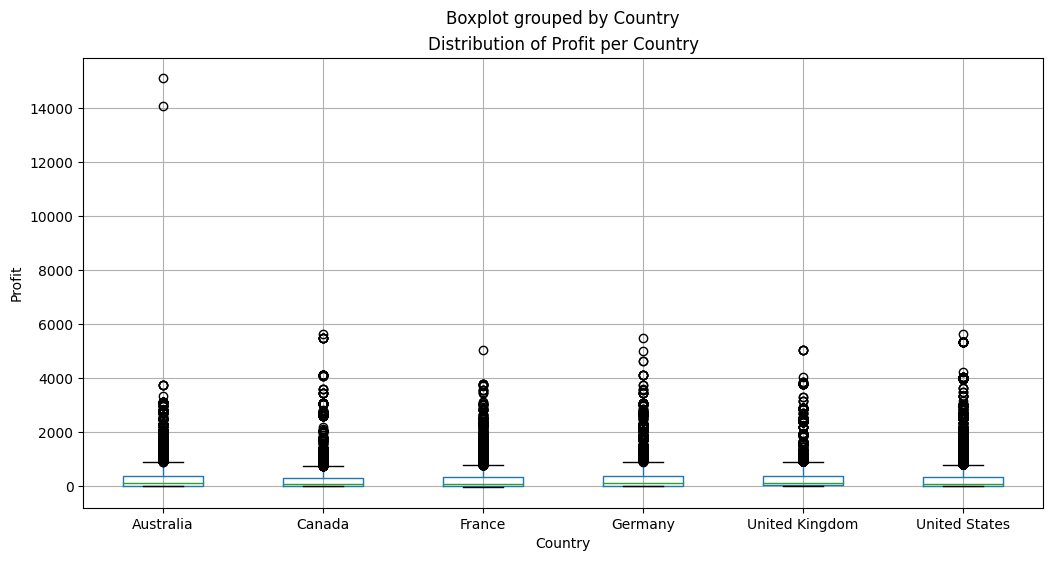

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot
sales.boxplot(column='Profit', by='Country', figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Profit')
plt.title('Distribution of Profit per Country')

# Show the plot
plt.show()


##Relationp b/w the Customer_Age per Country?
Show a grouped box plot country with the customer age values.

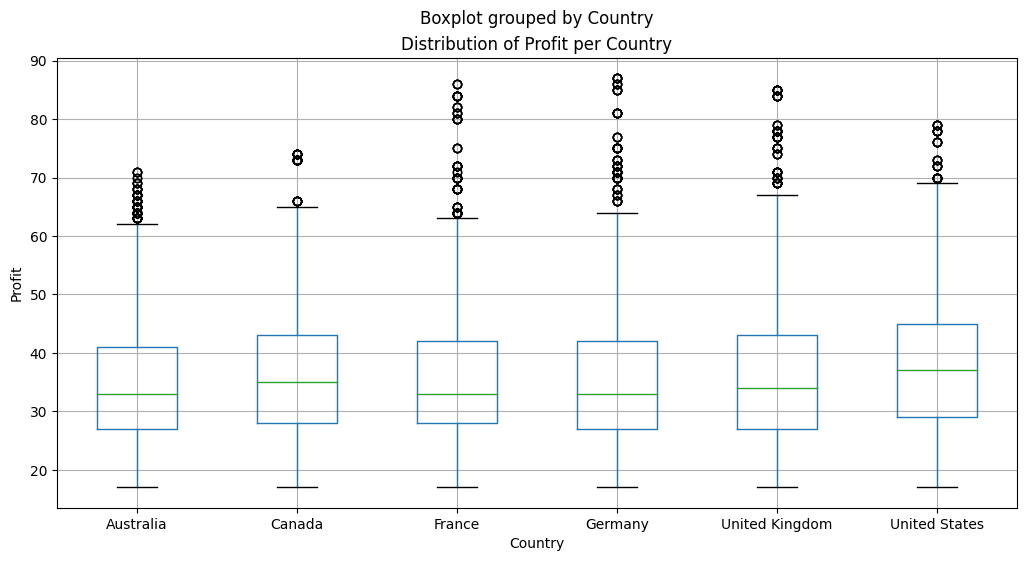

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot
sales.boxplot(column='Customer_Age', by='Country', figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Profit')
plt.title('Distribution of Profit per Country')

# Show the plot
plt.show()

##Add and calculate a new Calculated_Date column
Use Day, Month, Year to create a Data column (YYYY-MM-DD)

In [ ]:

sales['Calculated_Date'] = pd.to_datetime(sales[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1))
sales['Calculated_Date']

0        2013-11-26
1        2015-11-26
2        2014-03-23
3        2016-03-23
4        2014-05-15
            ...    
113031   2016-04-12
113032   2014-04-02
113033   2016-04-02
113034   2014-03-04
113035   2016-03-04
Name: Calculated_Date, Length: 113036, dtype: datetime64[ns]

In [ ]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [ ]:


# Create Calculated_Date column with month as string
sales['Calculated_Date'] = pd.to_datetime(sales[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)
                                        ).dt.strftime('%Y-%B-%d')
sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

##Parse your Calculated_Date column into a datatime object

In [ ]:
# Parse Calculated_Date column into datetime object
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

0   2023-05-15
1   2023-05-16
2   2023-05-17
Name: Date, dtype: datetime64[ns]
Minimum date: 2023-05-15 00:00:00
Maximum date: 2023-05-17 00:00:00
Number of days between dates: 2
0    2023-05-15
1    2023-05-16
2    2023-05-17
Name: Formatted_Date, dtype: object


#How did sales evolve through the years?

<Axes: >

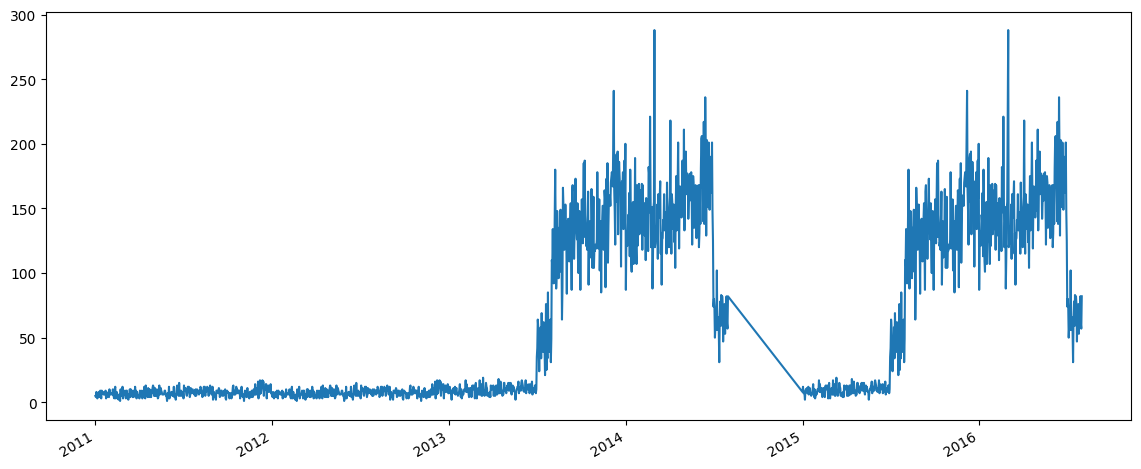

In [ ]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

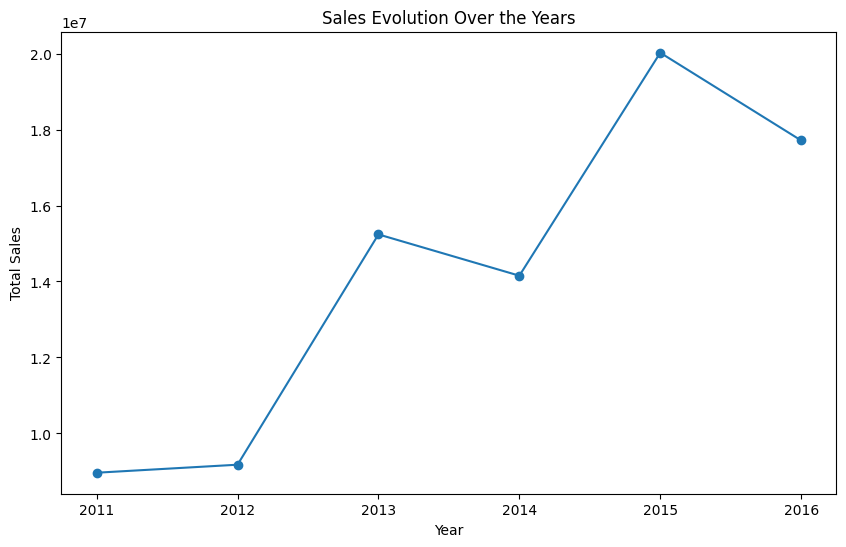

In [ ]:


# Assuming you have a DataFrame named 'sales' with a 'Date' column and a 'Sales' column

# Plot the sales evolution
sales.groupby(sales['Calculated_Date'].dt.year)['Revenue'].sum().plot(kind='line', marker='o', figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Evolution Over the Years')

# Display the plot
plt.show()


Increase 50 US$ revenue to every sale

In [ ]:
sales['Revenue'] += 50

##How many orders were made in Canada or France?

In [ ]:
orders_in_canada_france = sales[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')]
num_orders_canada_france = len(orders_in_canada_france)

print("Number of orders made in Canada or France:", num_orders_canada_france)
# or sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]


Number of orders made in Canada or France: 25176


##How many Bike Racks orders were made from Canada?

In [ ]:
bike_racks_canada = sales[(sales['Sub_Category'] == 'Bike Racks') & (sales['Country'] == 'Canada')]
num_bike_racks_canada = len(bike_racks_canada)

print("Number of Bike Racks orders made from Canada:", num_bike_racks_canada)
# Or sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]


Number of Bike Racks orders made from Canada: 104


# How many orders were made in each region (state) of France?

In [ ]:
france_states = sales.loc[ (sales['Country'] == 'France', 'State')].value_counts()
france_states

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

<Axes: >

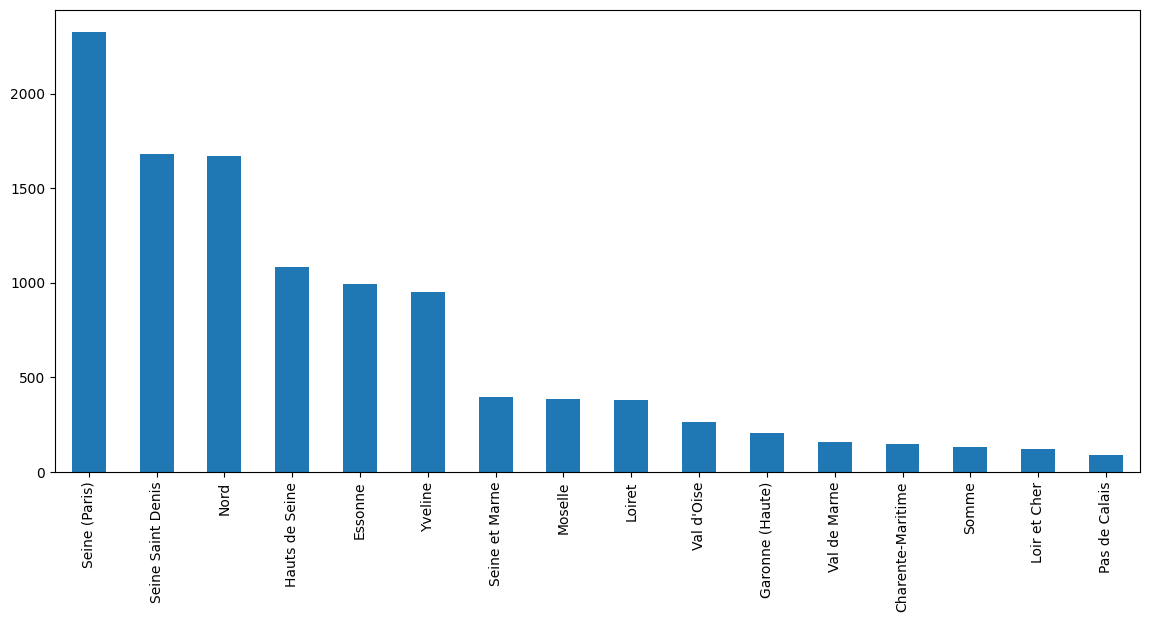

In [ ]:
france_states.plot(kind='bar', figsize=(14,6))

##How many sales were made per catagory?

In [ ]:
sales_per_catagory = sales['Product_Category'].value_counts()
sales_per_catagory

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<Axes: ylabel='Product_Category'>

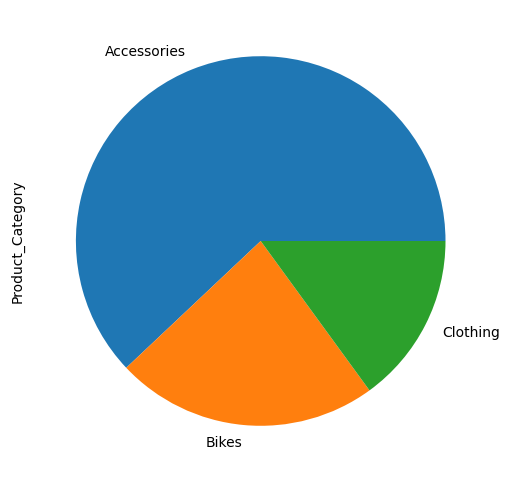

In [ ]:
sales_per_catagory.plot(kind='pie', figsize=(8,6))

##How many orders were made per accessory sub-categories?

In [ ]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

<Axes: >

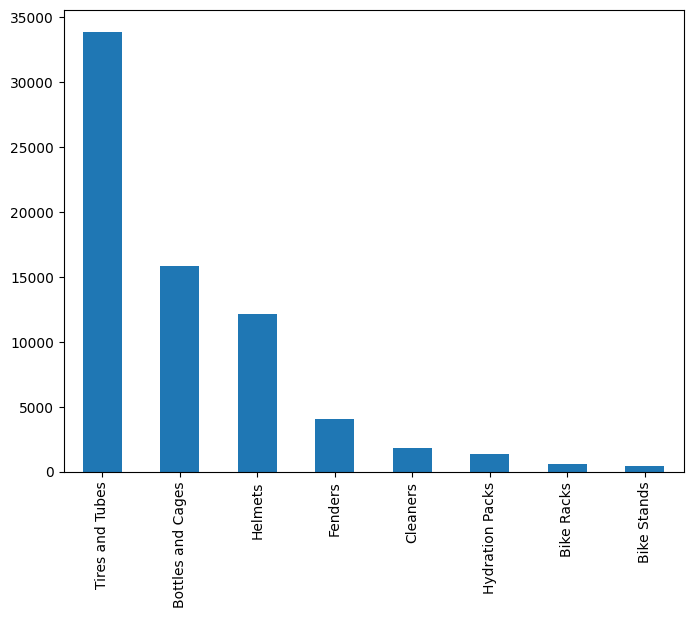

In [ ]:
accessories.plot(kind='bar', figsize=(8,6))

##How many orders were made per bike sub-categories?

In [ ]:
per_bike_order =  sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()
per_bike_order 

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

<Axes: ylabel='Sub_Category'>

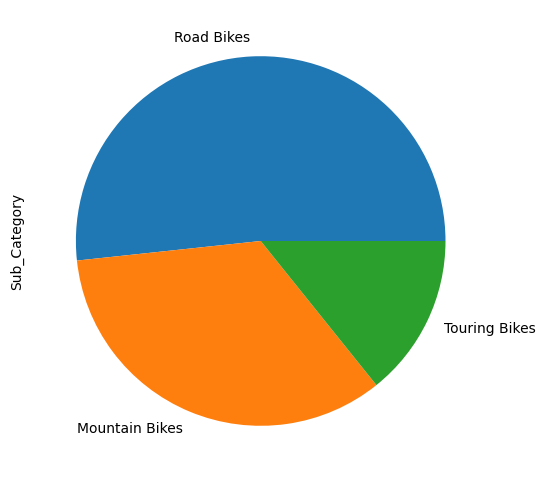

In [ ]:
per_bike_order.plot(kind='pie', figsize=(8,6))

#Which gender has the most amount of sales?

In [ ]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

<Axes: >

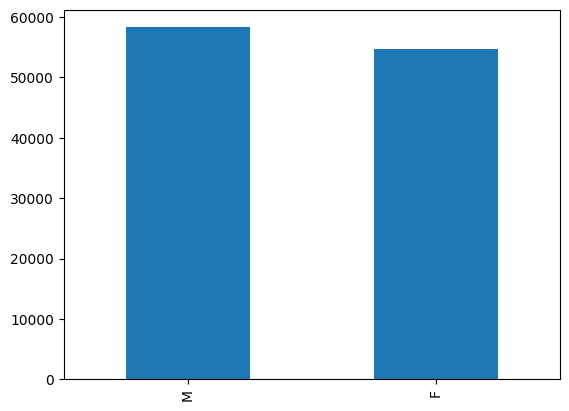

In [ ]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

##How many sales with more than 500 in Revenue were made by men?

In [ ]:
Gender = sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] > 500)].shape[0]
Gender

21773

##Get the top-5 sales with the highest revenue

In [ ]:
top_5_sales = sales.nlargest(5, 'Revenue')
top_5_sales

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312
59919,2011-03-20,20,March,2011,29,Young Adults (25-34),F,Germany,Bayern,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5485,8684,14169
68671,2011-07-05,5,July,2011,26,Young Adults (25-34),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 56",4,2171,3578,5485,8684,14169


##Get the sale with the highest revenue

In [ ]:
highest_revenue = sales.nlargest(1, 'Revenue')
highest_revenue

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074


##What is the mean Order_Quantity of orders with more than 10k in revenue?

In [ ]:
cond = sales['Revenue'] > 10_000

sales.loc[cond, 'Order_Quantity'].mean()

3.7218934911242605

##What is the mean Order_Quantity of orders with less than 10K in revenue?

In [ ]:
cond = sales['Revenue'] < 10_000

sales.loc[cond, 'Order_Quantity'].mean()

11.913907519469818

##How many orders were made in May of 2016?

In [ ]:
cond = (sales['Month'] == 'May') & (sales['Year'] == 2016)

total_quantity = sales.loc[cond, 'Order_Quantity'].shape[0]
total_quantity 

5015

.shape[0] to count the number of rows or sum() to calculate the sum of a specific column's value

##How many orders were made between May and July of 2016?

In [ ]:
cond = (sales['Month'].isin(['May', 'June', 'July'])) & (sales['Year'] == 2016)
total_quantity = sales.loc[cond, 'Order_Quantity'].shape[0]
total_quantity

12164

Show a grouped box plot per month with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

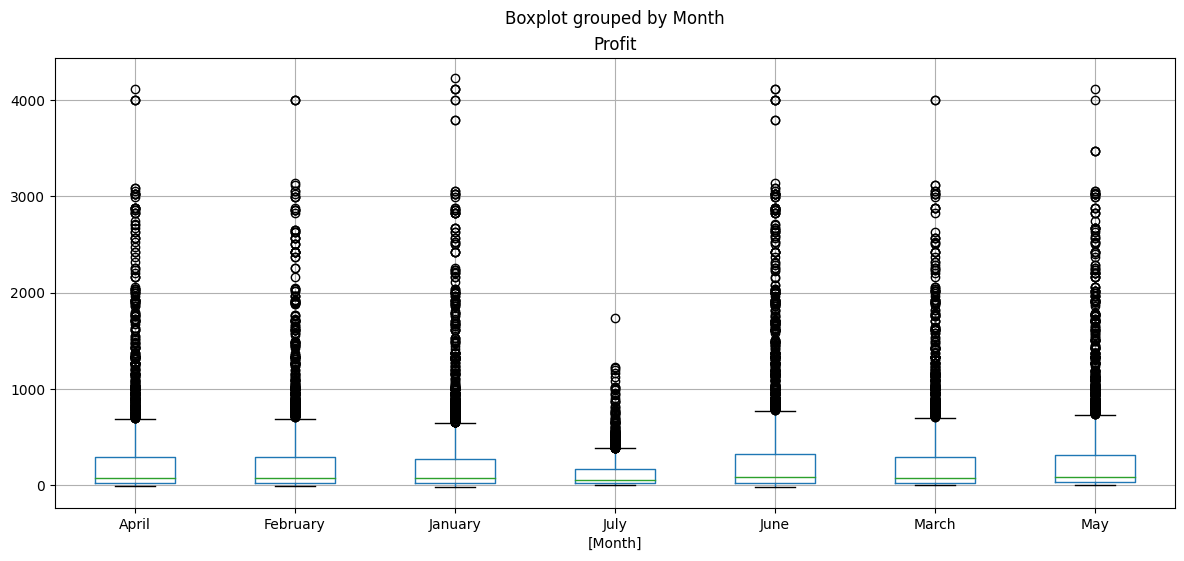

In [ ]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(14,6))

##Add 7.2% TAX on every sale Unit_Price within United States

In [ ]:


taxed_Profit = sales.loc [sales['Country'] == 'United States', 'Unit_Price'] * 0.072 
taxed_Profit


22        8.640
23        8.640
34        8.640
35        8.640
38        8.640
          ...  
113021    4.608
113022    4.608
113023    4.608
113024    4.608
113025    4.608
Name: Unit_Price, Length: 39206, dtype: float64